In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\guilh\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# importando os dados

imdb = pd.read_csv('datasets/movie_metadata.csv')

In [4]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
imdb.shape

(5043, 28)

In [6]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
imdb['lucro'] = imdb['gross'] - imdb['budget']

In [9]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN


In [10]:
imdb.shape

(5043, 29)

In [11]:
imdb.dropna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171,131507.0
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,663780.0
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0


In [12]:
imdb = imdb.drop_duplicates()

In [13]:
imdb_usa = imdb.query("country == 'USA'")

In [14]:
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,-59192738.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


In [45]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

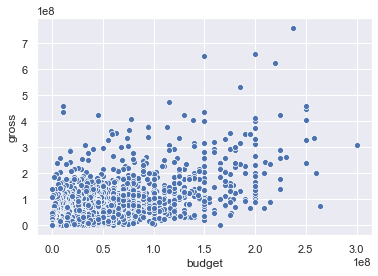

In [47]:
sns.scatterplot(x="budget", y="gross", data = budget_gross)
plt.show()

In [49]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

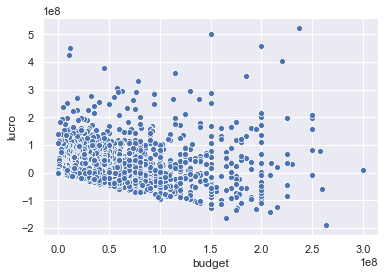

In [50]:
sns.scatterplot(x="budget", y="lucro", data = budget_gross)
plt.show()

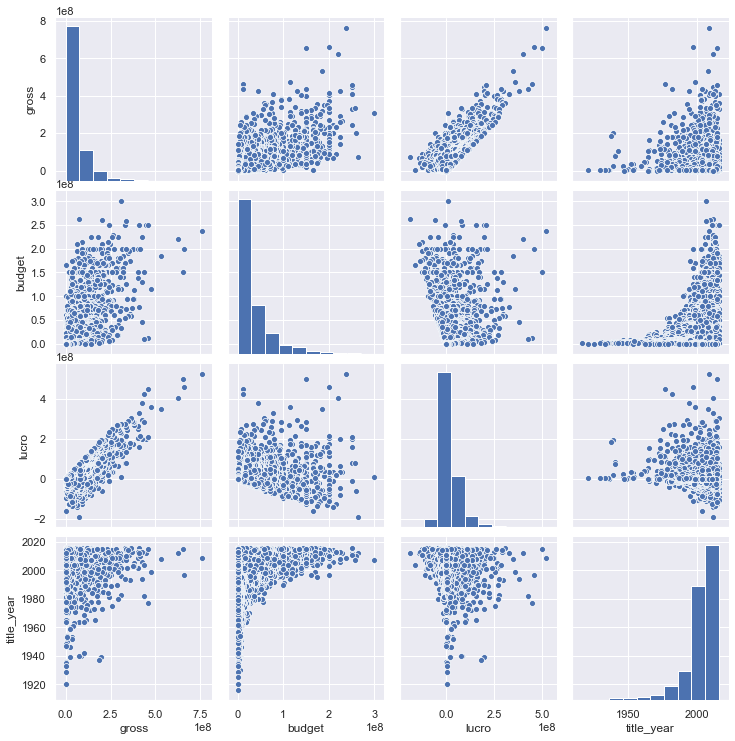

In [53]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])
plt.show()

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [24]:
colorOrBW = imdb.groupby('color').mean()['imdb_score'] 

In [27]:
colorOrBW

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

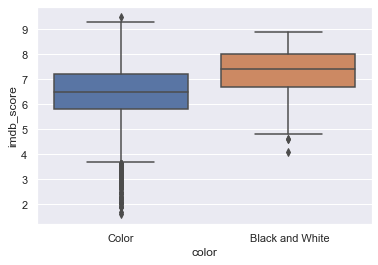

In [21]:
sns.boxplot(x='color', y='imdb_score', data=imdb)
plt.show()

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [51]:
imdb_usa.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


In [55]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'lucro'],
      dtype='object')

In [15]:
imdb_usa[imdb_usa['lucro'] == imdb_usa['lucro'].min()][['title_year', 'movie_title', 'director_name', 'gross', 'budget', 'lucro', 'imdb_score']]

,title_year,movie_title,director_name,gross,budget,lucro,imdb_score
5,2012.0,John Carter,Andrew Stanton,73058679.0,263700000.0,-190641321.0,6.6


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)


Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [61]:
imdb['title_year'].value_counts().sort_index(ascending=False)

2016.0    103
2015.0    222
2014.0    248
2013.0    236
2012.0    218
         ... 
1929.0      2
1927.0      1
1925.0      1
1920.0      1
1916.0      1
Name: title_year, Length: 91, dtype: int64

In [65]:
lucroPorAno= imdb.groupby('title_year').mean()['lucro']

title_year
1916.0             NaN
1920.0    2.900000e+06
1925.0             NaN
1927.0   -5.973565e+06
1929.0    2.429000e+06
              ...     
2012.0    1.638142e+07
2013.0    1.207894e+07
2014.0    1.739314e+07
2015.0    1.643970e+07
2016.0    1.377996e+07
Name: lucro, Length: 91, dtype: float64

In [77]:
lucroPorAno.values

array([            nan,  2.90000000e+06,             nan, -5.97356500e+06,
        2.42900000e+06,             nan,             nan,  1.86100000e+06,
                   nan,  2.39100000e+06, -1.33675500e+06,  1.82925485e+08,
                   nan,  1.07040445e+08,  7.79100000e+07,             nan,
                   nan,             nan,             nan,             nan,
        1.69750000e+07, -2.29207300e+06, -7.44000000e+05,             nan,
        4.23121500e+06,             nan,  3.20000000e+07,  1.78950000e+07,
        3.47953050e+06,             nan,             nan,  2.42000000e+07,
                   nan,  2.21161520e+07,  3.11930530e+07,  3.76500000e+07,
        2.98351750e+06,  2.87783333e+07,  3.37512405e+07,  5.89102318e+07,
        4.90000000e+06,  3.36000000e+07,  2.57576855e+07,  3.68452643e+07,
       -2.42500000e+06,  2.30653078e+07,  6.44962175e+07,  9.85641290e+07,
        5.04719337e+07,  1.20199874e+08,  6.61376235e+07,  9.43049707e+07,
        6.81875492e+07,  

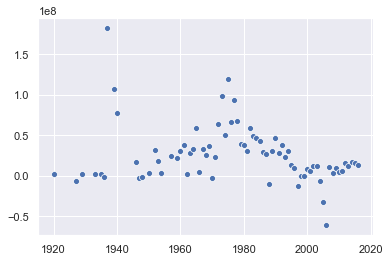

In [78]:
sns.scatterplot(data=lucroPorAno)
plt.show()

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [82]:
imdb1942 = imdb[imdb['title_year'] < 1942]

In [86]:
imdb1942[imdb1942['lucro'] == imdb1942['lucro'].max()][['title_year', 'movie_title', 'director_name', 'gross', 'budget', 'lucro', 'imdb_score']]

,title_year,movie_title,director_name,gross,budget,lucro,imdb_score
3970,1939.0,Gone with the Wind,Victor Fleming,198655278.0,3977000.0,194678278.0,8.2


## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.
